In [31]:
# Einstellungen fuer Plots
imagewidth = 800
plot_size = (18, 10)
half_plot_size = (18, 6)

In [32]:
%matplotlib inline
import numpy as np
np.random.seed(42)
import pandas as pd
import seaborn as sns
import math
from math import log 
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.datasets import load_wine
from IPython.display import SVG
from graphviz import Source
from IPython.display import display                               
from ipywidgets import interactive
from ipywidgets import interact, fixed

In [33]:
# Change style according to FH
import matplotlib.pyplot as plt
plt.style.use('img/fh_kiel.mplstyle')
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from palettable.colorbrewer.qualitative import Paired_8 as q_map



plt.set_cmap(q_map.mpl_colormap)
filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')

blue = '#30414D'
green = '#006A4D'
orange = '#E3AB44'
dark_red = '#C55024'
alarm_red = '#E20020'
light_green = '#7AB51D'

cmap_kiel = ListedColormap(['#30414D', '#E3AB44', '#C55024'])
cmap_kiel2 = ListedColormap(['#30414D', '#E3AB44']);

<Figure size 640x480 with 0 Axes>

# Grundlagen Maschinelles Lernen

## Fundamentals of Machine Learning


Prof. Dr.-Ing. Daniel Böhnke

<div style="text-align: right"> Woche 9 v1 </div>

# Rotation

<center><img src="img/tafel_rotation.png" width=40% class="stretch"></center>

* $x_1$ und $x_2$ sind die ursprünglichen Achsen der Daten.
* Hier kommt es aber zu großen Überlappungen, die eine Klassifizierung schwer machen.
* Wäre $x_{R1}$ nicht die bessere Alternative?

# Hauptkomponentenanalyse

* Wir suchen nach neuen Koordinatensystemen (KS) $Z$, die unsere Daten gut beschreiben!
* Das Ziel ist es, entlang der ersten Achse des neuen KS die Varianz zu maximieren.
* Das neue KS $Z$ baut sich zusammen aus den einzelnen Koordinaten des alten KS multipliziert mit einem Faktor $\phi$: 

$$Z_1 = \phi_{11}X_1 + \phi_{21}X_2 +\dots+\phi_{p1}X_p $$

* Beziehungsweise:

$$Z_1 = \phi_{horsepower, 1}X_{horsepower} + \phi_{weight, 1}X_{weight}$$

* Um das Ziel zu erreichen, müssen wir folgende Forderungen stellen: 
    * Die Summe alle $\phi^2$ in einer Richtung von $Z$ ist gleich 1.
    * Alle $\phi$ sollen so gewählt werden, dass die Varianz maximal wird.
    
* Um eine saubere Betrachtung zu ermöglichen, müssen die ursprünglichen Spalten normiert werden!
* Das führt uns zu folgendem Optimierungsproblem, dessen Lösung wir aber bestehenden Bibliotheken überlassen:

$$\max_{\phi_{11}, \dots, \phi_{p1}} \frac{1}{n}\sum_{i=1}^n\left( \sum_{j=1}^p \phi_{j1}x_{ij} \right) ^2$$



# Bagging

<center><img src="img/tafel_bagging.png" width=30% class="stretch"></center>


* Entscheidungsbäume leiden an hoher Varianz, d.h. wenn die Trainingsdaten anders gewählt sind, können die Ergebnisse stark beeinflußt werden.
* Da der Algorithmus gierig ist, wird stets die Spalte mit dem besten Split als erste Entscheidung gewählt. 
* D.h. je nach Auswahl der Daten kann es hier zur starken Abweichungen unter den Bäumen kommen.
* Anstatt einen Baum zu trainieren, werden viele Bäume zu einem Wald zusammengefasst.
* Jeder Baum bekommt nur einen Teil der Daten zu Verfügung.
* Das Ergebnis mitteln wir aus der Summe aller Antworten.

# Random Forest

<center><img src="img/tafel_random_forest.png" width=30% class="stretch"></center>

* Anstelle von Zeilen wählen wir zufällig Spalten aus. 
* Wenn ein Parameter dominant ist, filtern wir ihn regelmäßig heraus.
* Zu einem gewissen Teil wird damit der Gier des Algorithmus umgangen.
* In der Praxis hat es sich bewährt $m=\sqrt p$ Parameter zu behalten.

# Boosting

<center><img src="img/tafel_ada.png" width=30% class="stretch"></center>


* Bisher haben wir mehrere Bäume nebeneinander trainiert.
* Die Reihenfolge der Bäume hat keine Rolle gespielt.
* Es gab keine Interaktion zwischen den Bäumen.
* Beim Boosting versuchen wir einen Baum $b+1$ zu trainieren, der die Fehler der vorherigen $b$ Bäume korrigiert. 

# Lernlandkarte 
<center><img src="img/lernlandkarte.png" width=80% class="stretch"></center>

# Heute

* Data Science ist mehr als das Aufbereiten von Daten und Training von Modellen. 
* Mit **CRISP-DM** wird ein Vorgehensmodell eingeführt, welches große Teile des Data Science Arbeitsgebietes abdeckt und Sie bei der Semesterarbeit unterstützen soll. 
* Sie haben in zwischen einige Modelle kennen gelernt. Was nun noch fehlt ist das Einstellen bzw. Tunen der **Hyper-Parameter** dieser Modelle. 
* Das Problem wird heute adressiert und Lösungsvorschläge behandelt. 

# Warm-Up

* Sie haben bereits in der Übung mehrere Datensätze untersucht!
* Welche notwendigen Schritte können Sie abstrahieren?
* Wo haben Sie die meiste Zeit investiert?

# CRISP-DM


<table style='background:white'><tr style='background:white'><td style='background:white'><img src="img/pdm.png" class="stretch"></td><td style='background:white'><img src="img/CRISP-DM_Process.png" class="stretch"></td></tr></table>

* CRISP-DM ist einer der Standard-Prozesse für Data Mining.
* Des Weiteren existieren spezialisierte Prozessmodell für DM. z.B. Predictive Maintenance
* 2015 wurde von IBM auch ein Nachfolger mit dem Namen ASUM-DM vorgestellt. Dieser scheint aber nicht die gleiche Verbreitung zu haben. 

# Business Understanding

<center><img src="img/CRISP-DM_Process.png" width=20% class="stretch"></center>


* Bestimmen der Geschäftsziele (betriebswirtschaftlich und technisch)
* Bewerten des Geschäftsumfeldes
* Bestimmen der Data Mining Ziele
* Erstellen eines Projektplanes

# Bestimmen der Geschäftsziele (betriebswirtschaftlich und technisch)

<center><img src="img/use_case.png" width=20% class="stretch"></center>

*Es ist unser Ziel die Anzahl von Delays durch defekte Bremsscheiben um 30% zu reduzieren.*

* Es geht zunächst darum ein generelles Verständnis des Geschäfts zu erlangen.
* Hier ist es wichtig zunächst die relevanten Fragen zu finden, bevor man sich auf die Suche nach Antworten macht. 
* Aus einer Fragestellung (einem Problem) kann potentiell ein Use-Case entstehen.
* In der Regel ist es einfacher aus technischer Perspektive Use-Cases zu finden.
* Jeder Use-Case sollte aber auch wirtschaftlich bewertet werden.

# Bewerten des Geschäftsumfeldes

*Es besteht bereits ein operationales Umfeld für Predictive Maintenance. D.h. technische und personelle Ressourcen sind ausreichend vorhanden*

* Welche Ressourcen sind vorhanden bzgl:
    * Personal & Budget
    * Fach & Methodenkenntnis
    * Prozesse
    * Infrastruktur
* Welcher zeitliche Rahmen existiert?

# Bestimmen der Data Mining Ziele

*Unser Ziel ist es eine Klassifikation mit einem Recall > 30% bei sehr niedriger False Positive Rate zu entwickeln.*

* Es wird eine **Übersetzung** der technischen und wirtschaftlichen Ziele in methodische Ziele benötigt.
* So konkret und quantifizierbar wie möglich...
* Randfälle abdecken, die in der technischen Diskussion nicht präsent waren.

# Erstellen eines Projektplanes

*Das Projekt teilt sich in 5 AP. Folgende Ressourcen werden benötigt, Terminplan etc...*

* Grobe Planung über benötigte Ressourcen, Zeit & Meilensteinplanung. 
* Ggfs. separate Funktion (Projektleiter, Data Scientist etc.) innerhalb des Projektes
* Data Mining ist eine wissenschaftliche Tätigkeit und daher besteht stets die Möglichkeit des Scheiterns. Dies muss der Plan reflektieren.
* Ggfs. Anpassung an agile Vorgehensweisen, die sich gut für DM Probleme eignen. 

# Team Kompetenzen DS I

<center><img src="img/ven.png" width=40% class="stretch"></center>


# Team Kompetenzen II

<center><img src="img/skills.png" width=60% class="stretch"></center>


# Data Understanding

<center><img src="img/CRISP-DM_Process.png" width=20% class="stretch"></center>

* Initiale Sammlung von Daten
* Beschreiben der Daten
* Untersuchen der Daten
* Verifizierung der Daten-Qualität

# Initiale Sammlung von Daten
*Bremstemperaturen werden über einen ACARS Bericht aufgezeichnet. Versagensfälle sind in den Werkstattberichten verfügbar*

* Welche Daten sind verfügbar? Welche Daten können noch aufgezeichnet werden?
* Gibt es nützliche externe Quellen? Offen oder proprietär?
* Wo liegen die Daten? Wie kann darauf zugegriffen werden?
* Daten im besten Fall an zentraler Stelle für das Projekt ablegen. 

# Beschreiben der Daten
*BTX entspricht der Bremstemperatur in °C, X bezeichnet dabei eine bestimmte Bremse, aufgezeichnet wird in 10s Intervallen*

* Was ist in den Daten beschrieben? D.h. was ist der Inhalt jeder Spalte?
* Welche Daten sind verfügbar? Über welchen Zeitraum? Gab es Effekte wie Saisons etc.?
* Gibt es ein Datenschema?
* Mit welchem Schlüssel können Datensätze verknüpft werden?

# Untersuchen der Daten
*Bei Versagen einer Bremse wird selbige kühler, die andern Bremsen heißer*

<img style="float: right;" src="img/audio_scatter.png" width=60%>

* Univariate Statistik: Mittelwerte, Varianzen etc.
* Visualisieren der Daten
* Aufstellen erster Hypothesen
* Interaktion mit technischen Experten

# Verifizierung der Daten-Qualität
*Für ein Flugzeugmuster sind mehrer Datensätze pro Flug vorhanden. Offenbar löst der Report mehrfach aus.*

* Stimmt die Beschreibung der Daten mit den Daten überein? Machen die Einheiten Sinn?
* Ist der Umfang der Daten stimmig?
* Fehlen Datensätze?
* Gibt es Duplikate?

# Data Preparation

<center><img src="img/CRISP-DM_Process.png" width=20% class="stretch"></center>

* Auswahl der Daten
* Säubern der Daten
* Feature Engineering
* Integration der Daten
* Formatieren der Daten

**<center>Data Understanding & Preparation belegen bis zu 80% der Projektressourcen!</center>**

# Auswahl der Daten
*Die Auswahl beschränkt sich auf einige Flugzeugmuster. Daten nach Austausch einer Bremse werden ignoriert*

* Nicht alle Daten müssen notwendig sein, um einen Use-Case zu bearbeiten.
* Ggfs. sind nicht alle Daten gültig oder verwendbar.
* Für Klassifikation: Ein Balanced Data Set kann hilfreich sein.
* Test- und Validierungsdaten vorhalten.

# Säubern der Daten
*Doppelte Reports werden gefiltert.*

* Missing Values etc. auffüllen...
* Duplikate filtern...
* Ggfs. Ausreißer entfernen ...
* Potentiell weitere domänenabhängige Probleme bereinigen.

# Feature Engineering
*Es werden Moving Averages, Relative Bremstemperaturen etc. gebildet*

* Daten für den Algorithmus greifbar machen!
* Rotation und Skalierung von Daten. 
* Einfache physikalische Modelle hinzufügen.
* Statistische Hilfsmittel wie Min, Max, Moving Averages, Exponential Smooting etc.

**<center>Feature Engineering ist ein wichtiger Schlüssel zum Erfolg!</center>**

# Integration der Daten 
*Die Reports und Werkstattberichte werden zusammengefasst. X Flüge vor Ausbau einer Bremse als Fehlerhaft markiert*

* Label ($y$) und Prediktoren($X$) sind oft getrennt.
* Daten sollten persistiert sein, so dass Experimente wiederholbar sind.
* Datenstrecken sollten ebenfalls versioniert sein.
* Externe Daten (z.B. Wetter) mit integrieren.

# Formatieren der Daten
*Parquet Dateien auf dem HDFS*

* In welchem Format werden die Daten für die Modellierung benötigt?
* Bei kleinen Datenmengen ist dieser Schritt in der Regel vernachlässigbar.
* Für Big Data ein wichtiger Arbeitsschritt (nicht für diesen Kurs!).

# Modeling

<center><img src="img/CRISP-DM_Process.png" width=20% class="stretch"></center>

* Auswahl von Modellansätzen
* Definition von Test-Szenarien
* Training von Modellen
* Bewertung von Modellen

# Auswahl von Modellansätzen
*GBT, KNN, SVM, NN*

* Vorab ist es schwer das beste Modell zu bestimmen.
* Auswahl verschiedener Ansätze.
* Ist nur gute Performance wichtig, oder muss das Modell auch gut zu erklärbar sein?
* Einfache Modelle zunächst priorisieren und dann steigern.
* Ausschluß von Modellen ebenfalls dokumentieren.

# Definition von Test-Szenarien
*X negative Sample zur Bestimmung der False Positive Rate, X Prozent der Daten zum Training abgesplittet*

* Wie werden die Data Science Ziele quantifiziert?
* Was ist methodisch, technisch sinnvoll? Was ist überzeugend?
* Hier kommt es oft zu Iterationen: Die Performance für einzelne Fälle nachvollziehbar dokumentieren!

# Training von Modellen
*Nach einer Reihe initialer Experimente wurde Modell X als das Beste ausgewählt. Vertiefung der Experimente läuft*  

* Alle Modelle trainieren auf nahezu identischen Daten.
* Zunächst grobes Abtasten der Hyperparameter.
* In Schritten: Anzahl der Modelle veringern, mehr Hyperparameter untersuchen!

# Bewertung von Modellen
*Unter allen Modellen wurde eine Pareto Front über Recall und FPR aufgezeichnet*

* Quantifizierung der Data Science Ziele
* Bewertung weiterer Faktoren:
    * Rechenzeit
    * Erklärbarkeit / Nachvollziehbarkeit des Modells
    * Robustheit des Modells

# Evaluation

<center><img src="img/CRISP-DM_Process.png" width=20% class="stretch"></center>

* Evaluierung der Ergebnisse
* Review
* Weitere Planung

# Evaluierung der Ergebnisse
*In Bezug auf die initialen Ziele lässt sich festhalten, dass...*

* Übertragen der Data Science Ziele auf die technisch, wirtschaftlichen Ziele
* Wurden die Ziele erreicht?
* Gab es weitere Erkenntnisse, neue Use-Cases?
* Go / No-Go?


# Review
*Die verschiedenen Arbeitsschritte wurden von externer Seite zufriedenstellend geprüft.*

* Qualitätssicherung!
* Wurde CRISP-DM eingehalten?
* Ggfs. Code Review 
* Wird am besten von Unbeteiligten oder Externen vorgenommen.

# Weitere Planung
*Ein Deployment wird zeitnah empfohlen...*

* Welche Schritte sind für das weitere Deployment notwendig?
* Oder ist eine neue Schleife über Data Preparation & Modeling notwendig?
* Anpassung der Projektpläne

# Deployment

<center><img src="img/CRISP-DM_Process.png" width=20% class="stretch"></center>

* Operationalisierung planen
* Monitoring und Wartung planen
* Review Project
* Finaler Bericht

# Operationalisierung planen
*Die Operationalisierung soll in den folgenden Stufen ablaufen...*

* Technisch:
    * Wie werden die live Datenstrecken aufgebaut?
    * Wie kann mit dem Modell interagiert werden?
* Organisatorisch:
    * Wie wird das Ergebnis des Modells weiterverarbeitet?
    * Werden Arbeitsanweisungen automatisch ausgestellt oder manuell überprüft?
    * Bis wann und durch wen?
* Legal: 
    * Welche Prozesse sind betroffen? Gibt es Behördenanforderungen?
    * Betriebsrat mit einbeziehen?

# Monitoring und Wartung planen
*Die Modelle werden alle 3 Monate evaluiert. Im Falle eines Ausfalls der Infrastruktur...*

* Wie wird das Modell überwacht?
* Wie werden die Datenstrecken überwacht?
* Was passiert im Fall eines Ausfalls?
* Wann wird das Modell neu trainiert?

# Review Project
*Gemeinsam mit allen Beteiligten und einem externen Moderator wurde ein Lessons Learned Workshop durchgeführt*

* Inkl. Management
* Wurden Ziele erfüllt?
* Zeit, Budget und Qualität wie geplant eingehalten?
* Fokus mehr auf dem Mehrwert des Projektes und dem weitern Vorgehen als auf der Qualitätssicherung

# Finaler Bericht
*Alle Informationen zum Use-Case wurden an folgender Stelle im Intranet dokumentiert*

* Je nach Vorgaben der Organisation
* Ihre Prüfungsleistung!

## Hyperparameter Tuning vs. Feature Engineering 


<center><img src="img/tafel_fe.png" width=30% class="stretch"></center>

* Im Feature Engineering manipulieren wir $X$, um es dem Modell einfach zu machen.
* Im Hyperparameter Tuning passen wir die Stellschrauben von $f(x)$ an, um das Modell besser zu machen.
* z.B. verändern wir die Anzahl der Nachbarn bei einer k-NN Klassifizierung.

# Optimierung Dose

<center><img src="img/tafel_dose.png" width=30% class="stretch"></center>

* Im Grunde versuchen wir ein Extremwert- oder Optimierungsproblem zu lösen.
* Wie müssen die Parameter eines Modells eingestellt werden, damit es die beste Performance bringt?
* Gegeben ist eine Getränkedose mit 330ml Inhalt!
* Wählen Sie Radius $r$ und Höhe $h$ der Dose so, dass sie die minimale Menge Blech verwenden!

In [34]:
def ober(r):
    return 2*math.pi*r*r+2*330/r

def oberstrich(r):
    return 4*math.pi*r-2*330/(r*r)

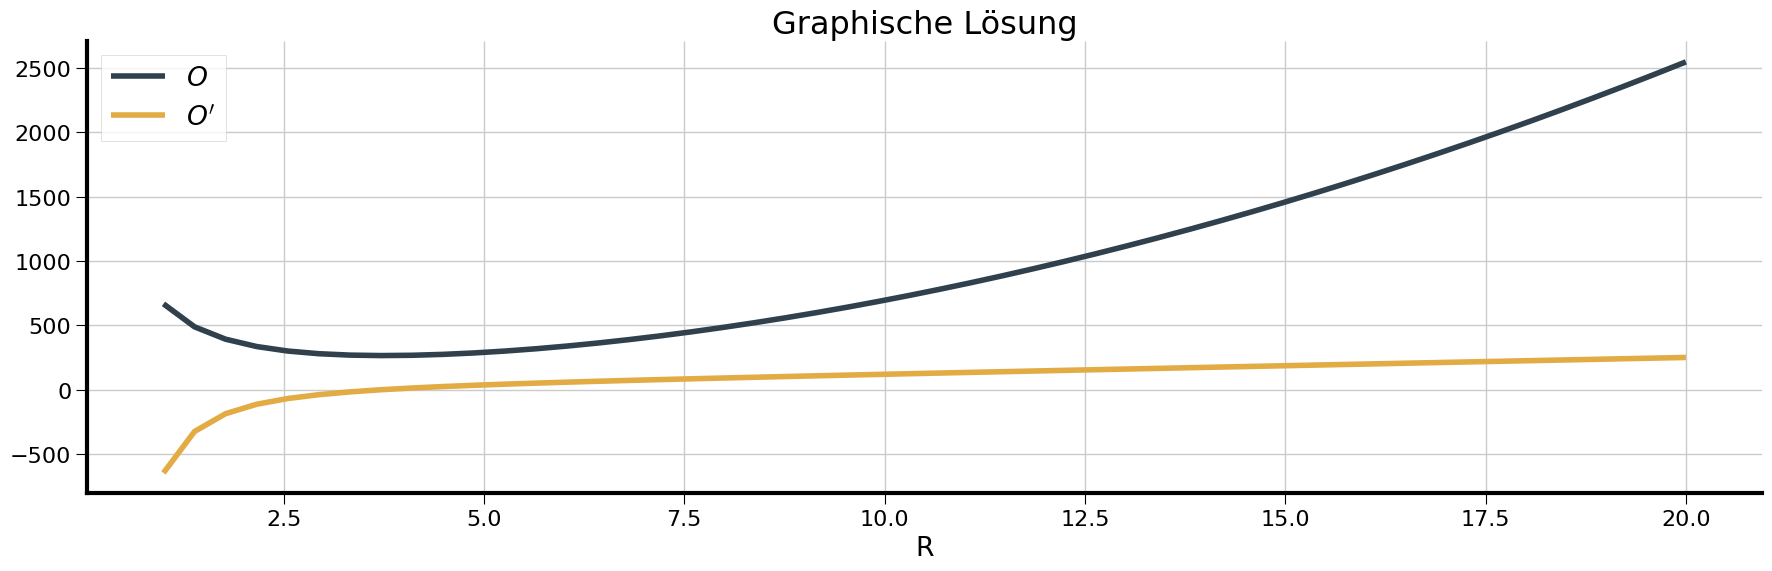

In [35]:
r = np.linspace(1,20)

# Plotte Lineare Regression für Elektro Motor
fig, ax = plt.subplots(1, 1, figsize=half_plot_size)


ax.plot(r,ober(r), '-', label='$O$')
ax.plot(r,oberstrich(r), '-', label="$O'$")

ax.legend()
plt.title('Graphische Lösung')
plt.ylabel('')
plt.xlabel('R')
plt.tight_layout()
plt.show()

# Begrifflichkeiten Optimierung

* Die Zielfunktion gibt die zu maximierenden / minimierende Größe an. z.B. Geringeste Kosten bei der Predictive Maintenance
* Zielfunktion:
$$O(r,h)$$
  

* Die Zielfunktion selber hängt von verschiedenen Parameter ab. z.B. Anzahl der Bäume
* Parameter / Variablen
$$r,h$$




* Bei der Optimierung sind bestimmte Randbedingungen zu beachten. z.B. Keine negative Anzahl von Bäumen
* Randbedingungen

$$r>0$$
$$h>0$$
$$V=330$$


# Blackbox

<center><img src="img/tafel_bb.png" width=30% class="stretch"></center>

* Wir kennen in der Regel weder die Definition der Zielfunktion noch der Randbedingung
* Selbst wenn, sind wir oft nicht in der Lage eine analytische Lösung zu finden
* D.h. Wir kennen die Formel nicht
* D.h. Wir können $V$ nicht in $O$ einsetzen, sondern gehen davon aus, dass sie Ergebnis der Blackbox sind

# Welche Probleme entstehen bei der Optimierung von ML-Modellen?

#### Nicht Kontinuierlich und nicht Diskretisierbar

* Alle Lösungen die wir jetzt **berechnet** haben, basieren auf kontinuierlichen Antworten der Blackbox 
* Aber die Klassifizierung kann keine kontinuierliche Antwort liefern:
    * Annahme: 1000 Sample stehen in der Validierungsmenge zur Verfügung 
    * Die Accuracy kann nur die folgenden Werte annehmen: 
    * [1., 0.999, 0.998, ...,0.001, 0]

#### Keine kontinuierliche Definitionsmenge

* Nicht nur die Antwort ist diskret...
* ... auch viele unserer $X$ sind es. 
* z.B. Die Anzahl der Nachbarn beim KNN

# Mit all diesen Problemen: Was bleibt uns als Lösung?

* Optimierung per Algorithmus
    * Möglich, aber kompliziert
    * Mixed Integer Non-Linear Program
    * z.B. Ameisen Algorithmen, Stochastic Gradient Descent, Genetische Algorithmen

* Brute Force Optimierung
    * Wir probieren verschiedene Zahlen aus!
    * Wird schnell numerisch teuer!
    * Gute Versuchsplanung kann hier helfen!

# Design of Experiments / Versuchsplanung

* Die Berechnung der Oberfläche und des Volumens sind sehr teuer
* Wir probieren verschiedene $r$, $h$ aus, um ein Optimum zu finden
* Wenn wir kein Vorwissen haben, an welchen Stellen untersuchen wir $r$, $h$?

* Space Filling
* Non Collapsing

* Deterministische Designs > Full-Factorial
* Randomisierte Designs > Monte Carlo
* Erweiterte randomisierte Designs > Latin Hypercube

## Full Factorial

<center><img src="img/tafel_ff.png" width=20% class="stretch"></center>

* vgl. kartesisches Produkt
* Vorgegebene Anzahl von Samplen
* Gute Verteilung im Raum
* Kollabiert
* Anfällig gegenüber lokalen Effekten
* Alternativen sind zahlreich: z.B. Box-Behnken & Central Composite Designs

In [36]:
from pyDOE2 import fullfact

n_level = 3
n_dimensions = 3
X = fullfact(n_dimensions*[n_level])/2
#X

In [37]:
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed
def plot_3D(elev=30, azim=30):
    fig = plt.figure(figsize=half_plot_size)

    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], X[:, 2], s=50, cmap=cmap_kiel2)
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('X3')
    plt.title('Full Factorial')

interact(plot_3D, elev=(-90, 90), azim=(-180, 180));



interactive(children=(IntSlider(value=30, description='elev', max=90, min=-90), IntSlider(value=30, descriptio…

## Monte Carlo

<center><img src="img/tafel_mc.png" width=20% class="stretch"></center>


* Rein zufallsbasierte Verteilung
* Beliebig viele Sample
* Untersucht viele Lokationen innerhalb einer Dimension
* Anfällig für Cluster von Samplen
* Ursprung im Manhatten-Projekt

*Metropolis, N., and Ulam, S. The monte carlo method. Journal of the American Statistical Association (1949)*

In [38]:
import numpy as np
X = np.random.rand(27,3)
#X

In [39]:
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed
def plot_3D(elev=30, azim=30):
    fig = plt.figure(figsize=half_plot_size)

    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], X[:, 2], s=50)
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('X3')
    plt.title('Monte Carlo')

interact(plot_3D, elev=(-90, 90), azim=(-180, 180));



interactive(children=(IntSlider(value=30, description='elev', max=90, min=-90), IntSlider(value=30, descriptio…

# Latin Hypercubes

<center><img src="img/Latin.png" width=30% class="stretch"></center>

* Unterteilt Entwurfsraum in soviele Intervalle wie Sample
* Zieht random Sample innerhalb eines Intervalls und kombiniert diese
* Merke: Farben eines Kirchenfensters
* Kann über Nested Latin Hypercubes erweitert werden
* Gute DoE können erheblichen Aufwand bedeuten https://spacefillingdesigns.nl/



*McKay, M. D., Beckman, R. J., and Conover, W. J. A comparison of Three Methods for Selecting Values of Input Variables in the Analysis of Output from a Computer Code. Technometrics 21 (1979)*

In [40]:
from pyDOE2 import lhs

X = lhs(3,27)
#X

In [41]:
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed
def plot_3D(elev=30, azim=30):
    fig = plt.figure(figsize=half_plot_size)

    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], X[:, 2], s=50, cmap=cmap_kiel2)
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('X3')
    plt.title('Latin Hypercube')

interact(plot_3D, elev=(-90, 90), azim=(-180, 180));



interactive(children=(IntSlider(value=30, description='elev', max=90, min=-90), IntSlider(value=30, descriptio…

# Vergleich über Histogramm

<center><img src="img/hist.png" width=50% class="stretch"></center>

* Vergleich der Designs über ein Histogramm.
* In den 16 Bins werden alle Punkte einsortiert.
* Desto mehr Punkte in eine Bin fallen, desto schwächer sind sie verteilt.





# Optimierung nach Bayes mit TPE

- **Bayesian Optimization**: Eine Methode zur Optimierung von Hyperparametern, die eine probabilistische Modellierung verwendet.
- **Tree-structured Parzen Estimator (TPE)**: Eine spezifische Implementierung der Bayesian Optimization, die die Suche nach optimalen Hyperparametern effizienter gestaltet.
- **Ziel**: Finden der besten Hyperparameter-Kombinationen für ein Modell, um die Leistungsfähigkeit zu maximieren.
- **Funktionsweise**:
  - Baut ein probabilistisches Modell der Ziel-Funktion.
  - Nutzt dieses Modell, um die nächsten Hyperparameter-Werte auszuwählen.
  - Aktualisiert das Modell iterativ basierend auf den Ergebnissen der gewählten Hyperparameter.
- **Vorteile**:
  - Effizienter als Grid- oder Random-Search.
  - Geeignet für Probleme mit teuren Evaluierungsfunktionen.

# Umsetzung der Bayesian Optimization mit TPE

- **Schritte der Implementierung**:
  1. **Initialisierung**: Beginne mit einer kleinen Anzahl zufällig ausgewählter Hyperparameter.
  2. **Probabilistisches Modell**: Erstelle ein probabilistisches Modell (z.B. Gauß-Prozess) basierend auf den bisherigen Evaluierungen.
  3. **Auswahlstrategie**: Wähle neue Hyperparameter, die die erwartete Verbesserung maximieren.
  4. **Evaluierung**: Teste die gewählten Hyperparameter und bewerte deren Leistung.
  5. **Modell-Update**: Aktualisiere das probabilistische Modell mit den neuen Ergebnissen.
  6. **Wiederholung**: Wiederhole die Schritte 3-5, bis ein Abbruchkriterium erreicht ist (z.B. Zeitlimit, Anzahl der Iterationen).


# Beispiel TPE

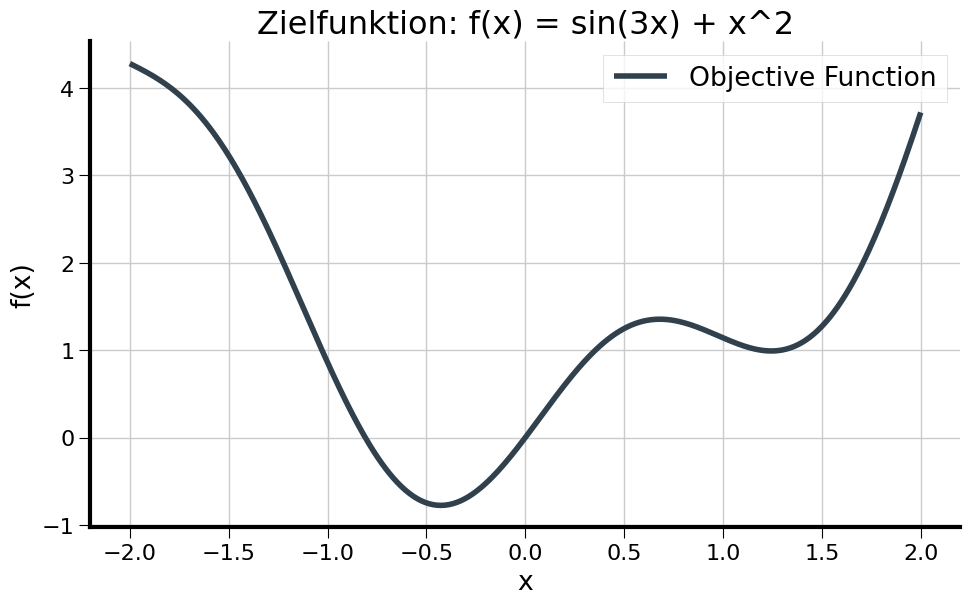

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from hyperopt import fmin, tpe, hp, Trials

# Definiere die Zielfunktion
def objective(x):
    return np.sin(3 * x) + x ** 2

# Erstelle eine Visualisierung der Zielfunktion
x = np.linspace(-2, 2, 400)
y = objective(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Objective Function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Zielfunktion: f(x) = sin(3x) + x^2')
plt.legend()
plt.show()


# Beispiel TPE

100%|██████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 360.37trial/s, best loss: -0.7759580483173154]


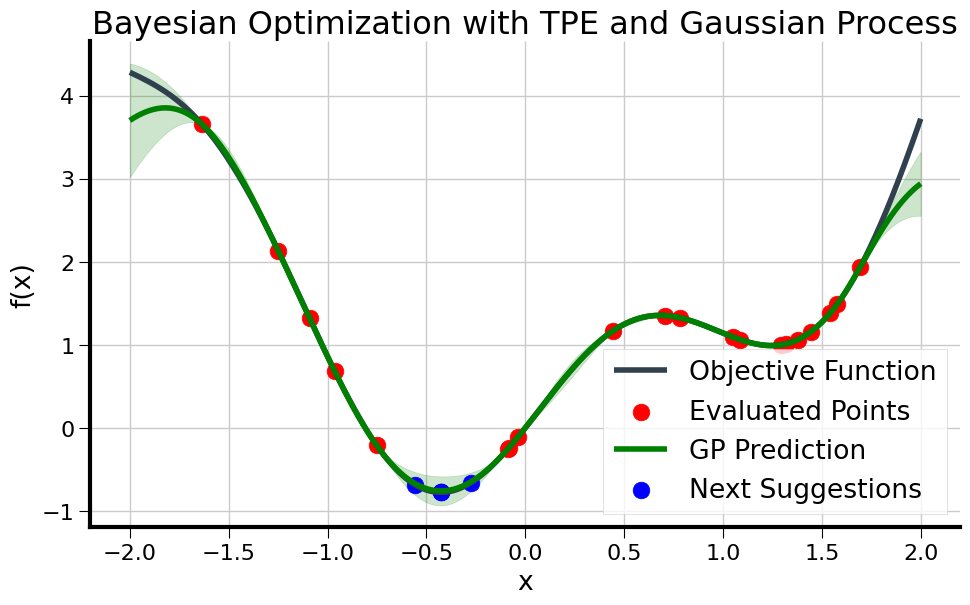

Best parameters: {'x': -0.0882226551143046}
Next suggested points: [[-0.27527955]
 [-0.5588499 ]
 [-0.4255967 ]
 [-0.4255967 ]
 [-0.4255967 ]]


In [43]:
import numpy as np
import matplotlib.pyplot as plt
from hyperopt import fmin, tpe, hp, Trials
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern

# Definiere die Zielfunktion
def objective(x):
    return np.sin(3 * x) + x ** 2

# Erstelle eine Visualisierung der Zielfunktion
x = np.linspace(-2, 2, 400).reshape(-1, 1)
y = objective(x)

# Definiere den Suchraum
search_space = hp.uniform('x', -2, 2)

# Initialisiere Trials-Objekt zur Speicherung der Ergebnisse
trials = Trials()

# Starte die Optimierung
best = fmin(fn=lambda x: objective(x),
            space=search_space,
            algo=tpe.suggest,
            max_evals=20,
            trials=trials)

# Visualisiere die Ergebnisse
x_vals = np.array([t['misc']['vals']['x'][0] for t in trials.trials]).reshape(-1, 1)
y_vals = np.array([t['result']['loss'] for t in trials.trials])

# Fit Gaussian Process
kernel = Matern(nu=2.5)
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=1e-6)
gp.fit(x_vals, y_vals)

# Predict using Gaussian Process
x_pred = np.linspace(-2, 2, 400).reshape(-1, 1)
y_pred, sigma = gp.predict(x_pred, return_std=True)

# Visualisierung
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Objective Function')
plt.scatter(x_vals, y_vals, color='red', label='Evaluated Points')
plt.plot(x_pred, y_pred, label='GP Prediction', color='green')
plt.fill_between(x_pred.ravel(), 
                 y_pred - 1.96 * sigma, 
                 y_pred + 1.96 * sigma, 
                 alpha=0.2, color='green')

# Vorschlag für die nächsten Punkte
def suggest_next_points(trials, search_space, n_points=5):
    next_points = []
    for _ in range(n_points):
        best = fmin(fn=lambda x: objective(x),
                    space=search_space,
                    algo=tpe.suggest,
                    max_evals=len(trials.trials) + 1,
                    trials=trials)
        new_point = best['x']
        next_points.append(new_point)
    return np.array(next_points)

next_points = suggest_next_points(trials, search_space).reshape(-1, 1)
next_vals = objective(next_points)

plt.scatter(next_points, next_vals, color='blue', label='Next Suggestions')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Bayesian Optimization with TPE and Gaussian Process')
plt.legend()
plt.show()

print("Best parameters:", best)
print("Next suggested points:", next_points)


# Zusammenfassung Hyperparameter Tuning

* In der Regel werden Sie (im Rahmen dieser Veranstaltung) keine saubere Optimierung für ein Hyperparameter Tuning umsetzen können. 
* ... insbesondere, wenn Sie mehr als einen Parameter betrachten.
* Für die Umsetzung unserer Probleme beziehen wir uns auf eine Gittersuche. 
* Bei einer hohen Anzahl von Parametern sollten MC oder LHC eingesetzt werden. 
* Ansonsten ist ein FFD vertretbar.
